# Clustering Algorithms 

Cluster analysis or clustering is the task of splitting given data points into separate groups, in such a way that data points in one group are similar (in some features) to each other compared to elements in other groups. 
One important aspect of clustering algorithms is, they are unsupervised algorithms, meaning generally there are no ground truth available for the dataset. 

Clustering is one of the exploratory data mining task and used in different fields,  
- Pattern recognition 
- Image analysis
- Bioinfomatics (gene clustering)
- Data compression
- Computer graphics 

Clustering can be achieved by various algorithms that differ significantly in their understanding of what constitutes a cluster and how to efficiently find them. Popular notions of clusters include groups with small distances between cluster members, dense areas of the data space, intervals or particular statistical distributions.


The notion of a "cluster" cannot be precisely defined, which is one of the reasons why there are so many clustering algorithms. There is a common denominator: a group of data objects. However, different researchers employ different cluster models, and for each of these cluster models again different algorithms can be given. The notion of a cluster, as found by different algorithms, varies significantly in its properties. Understanding these "cluster models" is key to understanding the differences between the various algorithms. Typical cluster models include:

- Connectivity models: for example, hierarchical clustering builds models based on distance connectivity.
- Centroid models: for example, the k-means algorithm represents each cluster by a single mean vector.
- Distribution models: clusters are modeled using statistical distributions, such as multivariate normal distributions used by the expectation-maximization algorithm.
- Density models: for example, DBSCAN and OPTICS defines clusters as connected dense regions in the data space.
- Subspace models: in biclustering (also known as co-clustering or two-mode-clustering), clusters are modeled with both cluster members and relevant attributes.
- Group models: some algorithms do not provide a refined model for their results and just provide the grouping information.
- Graph-based models: a clique, that is, a subset of nodes in a graph such that every two nodes in the subset are connected by an edge can be considered as a prototypical form of cluster. Relaxations of the complete connectivity requirement (a fraction of the edges can be missing) are known as quasi-cliques, as in the HCS clustering algorithm.
- Signed graph models: Every path in a signed graph has a sign from the product of the signs on the edges. Under the assumptions of balance theory, edges may change sign and result in a bifurcated graph. The weaker "clusterability axiom" (no cycle has exactly one negative edge) yields results with more than two clusters, or subgraphs with only positive edges.[6]
- Neural models: the most well known unsupervised neural network is the self-organizing map and these models can usually be characterized as similar to one or more of the above models, and including subspace models when neural networks implement a form of Principal Component Analysis or Independent Component Analysis.  

**Further Reading**  
https://en.wikipedia.org/wiki/Cluster_analysis  
https://scikit-learn.org/stable/modules/clustering.html  
https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68

Code for this is in here:  
https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html


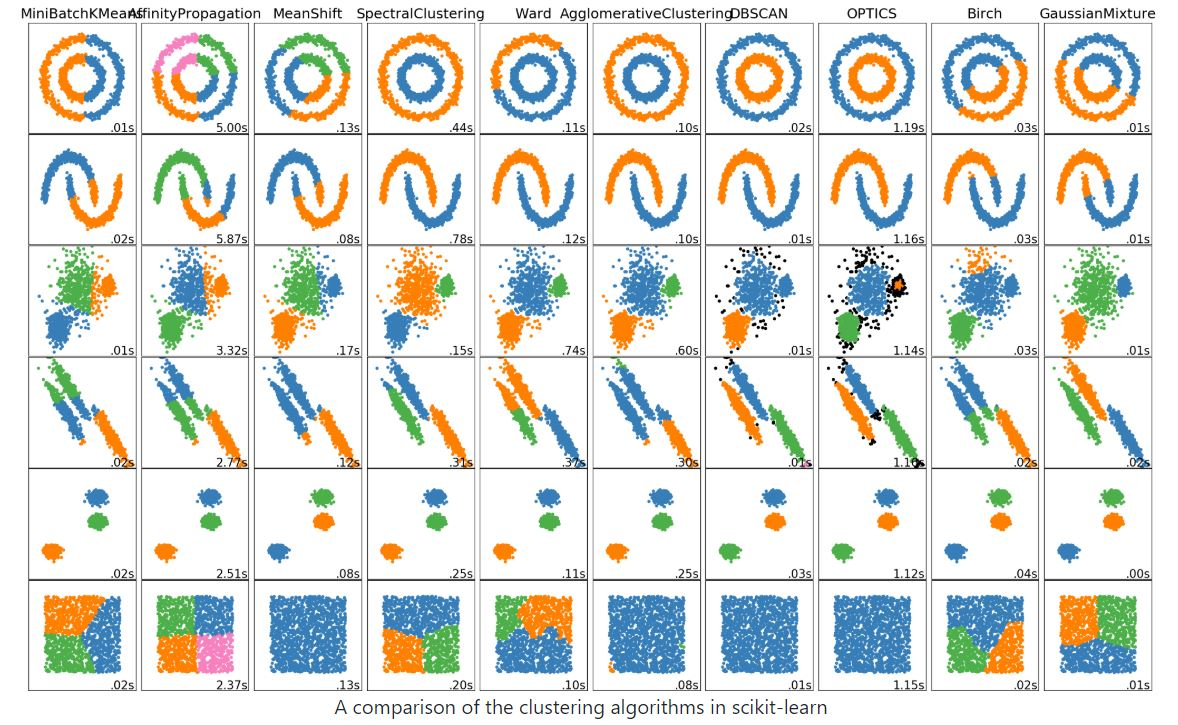   

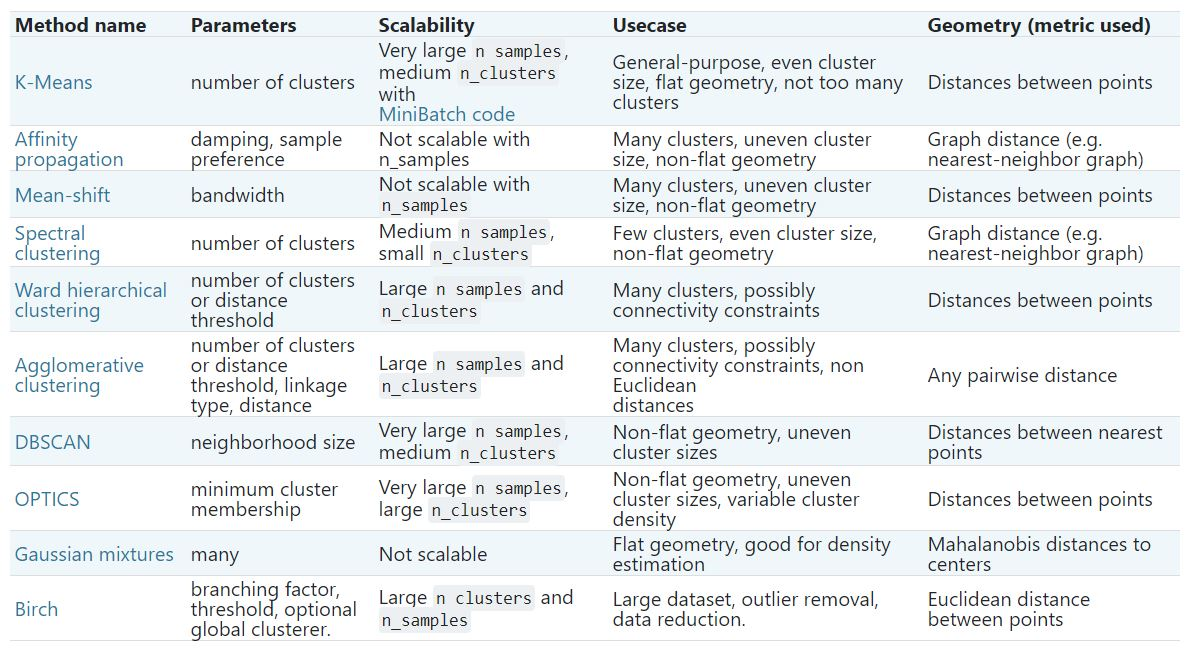

## K-means Clustering

The KMeans algorithm clusters data by trying to separate samples in $n$ groups of equal variance, minimizing a criterion known as the ***inertia*** or ***within-cluster sum-of-squares***. This algorithm requires the number of clusters to be specified. It scales well to large number of samples and has been used across a large range of application areas in many different fields.

**Advantages**  
- Simple intuition and implementation
- Scales well to large datasets

**Drawbacks**  
- Inertia makes the assumption that clusters are convex and isotropic, which is not the case sometimes. Hence, K-means does not suit to certain distributions of data.
- Inertia is not a normalized metric. So, in high dimensional spaces, Euclidian distance become inflate (curse of dimensionality). Running PCA and/or feature normalization generally alleviate this problem and speed up the computation. 

**Example Implementation**  
https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html#sphx-glr-auto-examples-cluster-plot-kmeans-assumptions-py

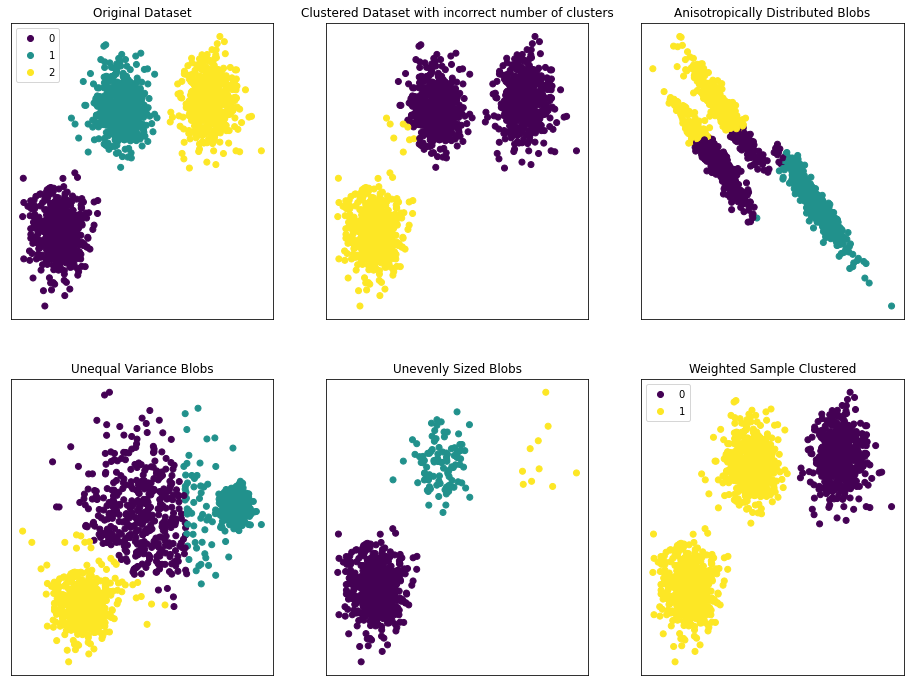

In [91]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

random_state = 170

X, y = make_blobs(n_samples=1500, centers= 3, random_state= random_state)

plt.figure(figsize=[16, 12])

# Original dataset
plt.subplot(231)
scatter = plt.scatter(X[:,0], X[:,1], c=y)
plt.title('Original Dataset')
plt.xticks([])
plt.yticks([])
plt.legend(*scatter.legend_elements())

# Incorrect number of clusters 
kmean_cluster = KMeans(n_clusters=2, init='k-means++', random_state = random_state)
y_pred = kmean_cluster.fit_predict(X = X,)
plt.subplot(232)
plt.scatter(X[:,0], X[:,1], c=y_pred)
plt.title('Clustered Dataset with incorrect number of clusters')
plt.xticks([])
plt.yticks([])

# anisotropically distributed data
transformation = np.array([[0.608, -0.636], [-0.408, 0.852]])
X_aniso = np.dot(X, transformation)
kmean_cluster = KMeans(n_clusters=3, init='k-means++', random_state = random_state)
y_pred = kmean_cluster.fit_predict(X = X_aniso)
plt.subplot(233)
plt.scatter(X_aniso[:,0], X_aniso[:,1], c=y_pred)
plt.title('Anisotropically Distributed Blobs')
plt.xticks([])
plt.yticks([])   

# Different variance
X_varied, y_varied = make_blobs(n_samples=1500, cluster_std=[1.0, 2.5, 0.5], random_state=random_state)
kmean_cluster = KMeans(n_clusters=3, init='k-means++', random_state = random_state)
y_pred = kmean_cluster.fit_predict(X = X_varied)
plt.subplot(234)
plt.scatter(X_varied[:,0], X_varied[:,1], c=y_pred)
plt.title('Unequal Variance Blobs')
plt.xticks([])
plt.yticks([])   

# Unevenly sized blobs
# both of following row stacking works
#X_filtered = np.vstack([X[y==0][:500], X[y==1][:100], X[y==2][:10]])
X_filtered = np.r_[X[y==0][:500], X[y==1][:100], X[y==2][:10]]

kmean_cluster = KMeans(n_clusters=3, init='k-means++', random_state = random_state)
y_pred = kmean_cluster.fit_predict(X = X_filtered)
plt.subplot(235)
plt.scatter(X_filtered[:,0], X_filtered[:,1], c=y_pred)
plt.title('Unevenly Sized Blobs')
plt.xticks([])
plt.yticks([])  


# giving weights to some samples
weights = np.ones(y.shape)
weights[y==0] = 1
weights[y==1] = 30
weights[y==2] = 30

kmean_cluster = KMeans(n_clusters=2, init='k-means++', random_state = random_state)
y_pred = kmean_cluster.fit_predict(X = X, sample_weight=weights)
plt.subplot(236)
scatter = plt.scatter(X[:,0], X[:,1], c=kmean_cluster.labels_)
plt.title('Weighted Sample Clustered')
plt.xticks([])
plt.yticks([])
plt.legend(*scatter.legend_elements())

plt.show()

**Note regarding Sample weights**

Refer plot (1,2) and (2,3). In both cases, we set the number of clusters equal to 2. 

**In Plot (1,2)**: With the equal weights for all samples, it is obvious that K-means will pick the upper two blobs as one group. Because, they are closer together and have low within-cluster Squared sum of distances (inertia). 


**In Plot (2,3)**: Here, weights for upper two blobs (class 2 and 3) is high (30x) compared to lower blob (class 1). Our objective function is reducing the inertia for each cluster. So, in this case, when we have higher weights for upper two classes, they would not combine each other because that would make their combined inertia so large compared to lower blob. So, what happens is, those two higher weights will have their own clusters and attract small weighted clusters into them. This is why you see that, even though upper two blobs are close to each other, they would stand as separate clusters and lower blob (class 0) is assigned to its closest biggest cluster, which is class 1.  



## Mini Batch K-means

The MiniBatchKMeans is a variant of the KMeans algorithm which uses mini-batches to reduce the computation time, while still attempting to optimise the same objective function. Mini-batches are subsets of the input data, randomly sampled in each training iteration. These mini-batches drastically reduce the amount of computation required to converge to a local solution. In contrast to other algorithms that reduce the convergence time of k-means, mini-batch k-means produces results that are generally only slightly worse than the standard algorithm.

Time Taken for mini-batch K-means: 0.3620026111602783 Inertia: 25090.20343225785
Time Taken for KMeans: 0.22661638259887695 Inertia: 25079.014257389754


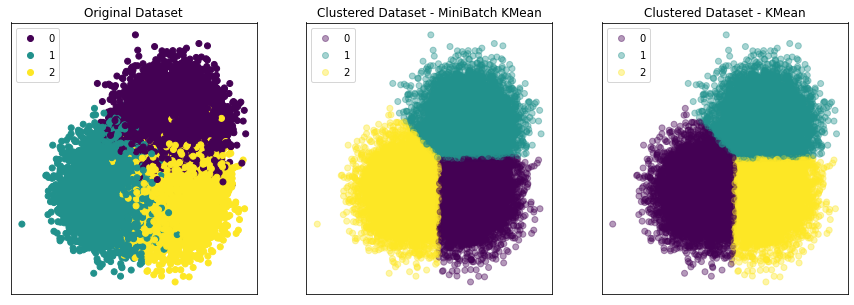

In [112]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from time import time

random_state = 170

centers = [[1, 1], [-1, -1], [1, -1]]
n_clusters = len(centers)
X, labels_true = make_blobs(n_samples=30000, centers=centers, cluster_std=0.7)

plt.figure(figsize=[15,5])

# Original dataset
plt.subplot(131)
scatter = plt.scatter(X[:,0], X[:,1], c=labels_true)
plt.title('Original Dataset')
plt.xticks([])
plt.yticks([])
plt.legend(*scatter.legend_elements())

t0 = time()

clustering = MiniBatchKMeans(n_clusters=3, init='k-means++',batch_size=50)
labels = clustering.fit(X = X).labels_
print('Time Taken for mini-batch K-means:', time()-t0, 'Inertia:', clustering.inertia_)

plt.subplot(132)
scatter = plt.scatter(X[:,0], X[:,1], c=labels, marker='o', alpha = 0.4)
plt.title('Clustered Dataset - MiniBatch KMean')
plt.xticks([])
plt.yticks([])
plt.legend(*scatter.legend_elements())


t0 = time()
clustering = KMeans(n_clusters=3, init='k-means++')
labels = clustering.fit(X = X).labels_
print('Time Taken for KMeans:', time()-t0, 'Inertia:', clustering.inertia_)

plt.subplot(133)
scatter = plt.scatter(X[:,0], X[:,1], c=labels, marker='o', alpha = 0.4)
plt.title('Clustered Dataset - KMean')
plt.xticks([])
plt.yticks([])
plt.legend(*scatter.legend_elements())

plt.show()

## Affinity Propagation

Affinity Propagation is an unsupervised machine learning algorithm that is particularly well suited for problems where we don’t know the optimal number of clusters.

The main drawback of Affinity Propagation is its complexity. Algorithm has a time complexity of the order $O(N^2T)$, where $N$ is the number of samples and $T$ is the number of iteration until convergence. This makes Affinity Propagation most appropriate for small to medium sized datasets.

https://towardsdatascience.com/unsupervised-machine-learning-affinity-propagation-algorithm-explained-d1fef85f22c8

## Mean Shift

MeanShift clustering aims to discover blobs in a smooth density of samples. It is a centroid based algorithm, which works by updating candidates for centroids to be the mean of the points within a given region. These candidates are then filtered in a post-processing stage to eliminate near-duplicates to form the final set of centroids.

The algorithm is not highly scalable, as it requires multiple nearest neighbor searches during the execution of the algorithm. The algorithm is guaranteed to converge, however the algorithm will stop iterating when the change in centroids is small.

Time taken MeanShift Clustering: 0.201568603515625
Time taken KMeans Clustering: 0.03910398483276367


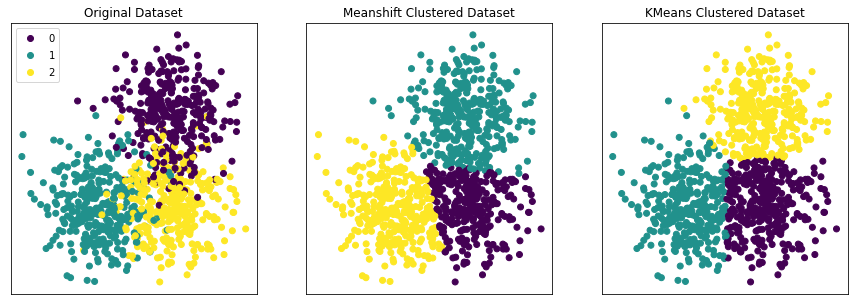

In [120]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth

from time import time

random_state = 170

centers = [[1, 1], [-1, -1], [1, -1]]
n_clusters = len(centers)
X, labels_true = make_blobs(n_samples=1000, centers=centers, cluster_std=0.7)

bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

plt.figure(figsize=[15,5])

# Original dataset
plt.subplot(131)
scatter = plt.scatter(X[:,0], X[:,1], c=labels_true)
plt.title('Original Dataset')
plt.xticks([])
plt.yticks([])
plt.legend(*scatter.legend_elements())

t0 = time()
clustering = MeanShift(bandwidth=bandwidth, bin_seeding=True)
y_pred = clustering.fit_predict(X)
print('Time taken MeanShift Clustering:', time() - t0)
plt.subplot(132)
scatter = plt.scatter(X[:,0], X[:,1], c=y_pred)
plt.title('Meanshift Clustered Dataset')
plt.xticks([])
plt.yticks([])

t0 = time()
clustering = KMeans(n_clusters= 3, init = 'k-means++')
y_pred = clustering.fit_predict(X)
print('Time taken KMeans Clustering:', time() - t0)
plt.subplot(133)
scatter = plt.scatter(X[:,0], X[:,1], c=y_pred)
plt.title('KMeans Clustered Dataset')
plt.xticks([])
plt.yticks([])

plt.show()

## Hierarchical Clustering

Hierarchical clustering is a general family of clustering algorithms that build nested clusters by merging or splitting them successively. This hierarchy of clusters is represented as a tree (or dendrogram). The root of the tree is the unique cluster that gathers all the samples, the leaves being the clusters with only one sample. 

The ***AgglomerativeClustering*** object performs a hierarchical clustering using a bottom up approach: each observation starts in its own cluster, and clusters are successively merged together. The linkage criteria determines the metric used for the merge strategy:

* Ward minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.

* Maximum or complete linkage minimizes the maximum distance between observations of pairs of clusters.

* Average linkage minimizes the average of the distances between all observations of pairs of clusters.

* Single linkage minimizes the distance between the closest observations of pairs of clusters.

AgglomerativeClustering can also scale to large number of samples when it is used jointly with a connectivity matrix, but is computationally expensive when no connectivity constraints are added between samples: it considers at each step all the possible merges.

Agglomerative cluster has a “rich get richer” behavior that leads to uneven cluster sizes. In this regard, single linkage is the worst strategy, and Ward gives the most regular sizes. However, the affinity (or distance used in clustering) cannot be varied with Ward, thus for non Euclidean metrics, average linkage is a good alternative. Single linkage, while not robust to noisy data, can be computed very efficiently and can therefore be useful to provide hierarchical clustering of larger datasets. Single linkage can also perform well on non-globular data.

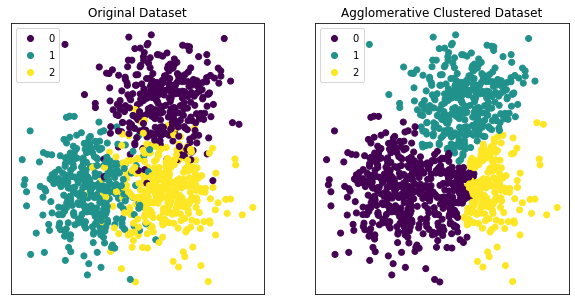

In [126]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from time import time

random_state = 170

centers = [[1, 1], [-1, -1], [1, -1]]
n_clusters = len(centers)
X, labels_true = make_blobs(n_samples=1000, centers=centers, cluster_std=0.7)

plt.figure(figsize=[10,5])

# Original dataset
plt.subplot(121)
scatter = plt.scatter(X[:,0], X[:,1], c=labels_true)
plt.title('Original Dataset')
plt.xticks([])
plt.yticks([])
plt.legend(*scatter.legend_elements())

# Agglomerative Clustering
clustering = AgglomerativeClustering(n_clusters = 3, affinity='euclidean', linkage='ward')
y_pred = clustering.fit(X).labels_
plt.subplot(122)
scatter = plt.scatter(X[:,0], X[:,1], c=y_pred)
plt.title('Agglomerative Clustered Dataset')
plt.xticks([])
plt.yticks([])
plt.legend(*scatter.legend_elements())

C:\Users\d800642\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:478: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  affinity=affinity)


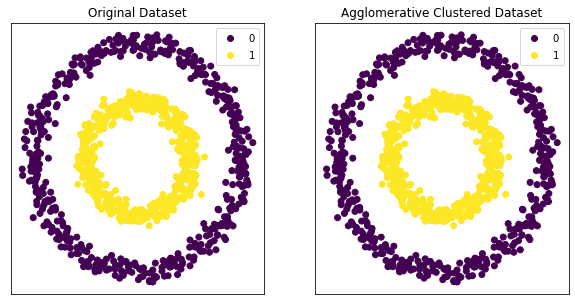

In [175]:
# Let's try an interesting boundary
from sklearn.datasets import make_circles

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.neighbors import kneighbors_graph

X, y = make_circles(n_samples=1000, noise = 0.05, factor=0.5)

plt.figure(figsize=[10,5])

# Original dataset
plt.subplot(121)
scatter = plt.scatter(X[:,0], X[:,1], c=y)
plt.title('Original Dataset')
plt.xticks([])
plt.yticks([])
plt.legend(*scatter.legend_elements())


connectivity = kneighbors_graph(X, n_neighbors=10, include_self=False)
    # make connectivity symmetric
connectivity = 0.5 * (connectivity + connectivity.T)
    
# Agglomerative Clustering
clustering = AgglomerativeClustering(linkage="average", 
                                     affinity="cityblock", 
                                     n_clusters=2,
                                     connectivity=connectivity)
y_pred = clustering.fit(X).labels_
plt.subplot(122)
scatter = plt.scatter(X[:,0], X[:,1], c=y_pred)
plt.title('Agglomerative Clustered Dataset')
plt.xticks([])
plt.yticks([])
plt.legend(*scatter.legend_elements())

## DBSCAN

The DBSCAN algorithm views clusters as areas of high density separated by areas of low density. Due to this rather generic view, clusters found by DBSCAN can be any shape, as opposed to k-means which assumes that clusters are convex shaped. The central component to the DBSCAN is the concept of core samples, which are samples that are in areas of high density. A cluster is therefore a set of core samples, each close to each other (measured by some distance measure) and a set of non-core samples that are close to a core sample (but are not themselves core samples).

**Important Parameters**
- $\text{min_samples}$: minimum number of samples to be within $\text{eps}$ distance from a given point to consider it as a core sample.
- $\text{eps}$: Distance within which $min_samples$ to be located to consider the given point as a core node. 

Higher $\text{min_samples}$ or lower $\text{eps}$ indicate higher density necessary to form a cluster. 

A cluster is a set of core samples that can be built by recursively taking a core sample, finding all of its neighbors that are core samples, finding all of their neighbors that are core samples, and so on. A cluster also has a set of non-core samples, which are samples that are neighbors of a core sample in the cluster but are not themselves core samples. Intuitively, these samples are on the fringes of a cluster.

Any core sample is part of a cluster, by definition. Any sample that is not a core sample, and is at least $\text{eps}$ in distance from any core sample, is considered an outlier by the algorithm.

([], <a list of 0 Text major ticklabel objects>)

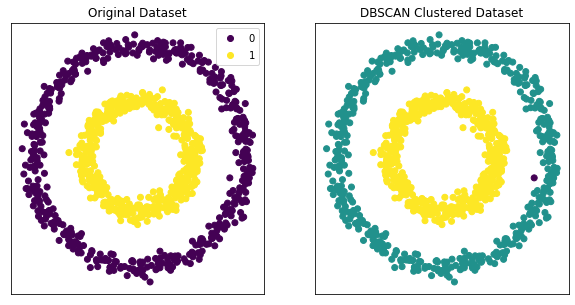

In [179]:
# Let's try an interesting boundary
from sklearn.datasets import make_circles

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.neighbors import kneighbors_graph

X, y = make_circles(n_samples=1000, noise = 0.05, factor=0.5)

plt.figure(figsize=[10,5])

# Original dataset
plt.subplot(121)
scatter = plt.scatter(X[:,0], X[:,1], c=y)
plt.title('Original Dataset')
plt.xticks([])
plt.yticks([])
plt.legend(*scatter.legend_elements())


connectivity = kneighbors_graph(X, n_neighbors=10, include_self=False)
    # make connectivity symmetric
connectivity = 0.5 * (connectivity + connectivity.T)
    
# Agglomerative Clustering
clustering = DBSCAN(min_samples=5, eps = 0.1)

y_pred = clustering.fit(X).labels_
plt.subplot(122)
scatter = plt.scatter(X[:,0], X[:,1], c=y_pred)
plt.title('DBSCAN Clustered Dataset')
plt.xticks([])
plt.yticks([])

## OPTICS

The OPTICS algorithm shares many similarities with the DBSCAN algorithm, and can be considered a generalization of DBSCAN that relaxes the $\text{eps}$ requirement from a single value to a value range. The key difference between DBSCAN and OPTICS is that the OPTICS algorithm builds a reachability graph, which assigns each sample both a $\text{reachability_ distance}, and a spot within the cluster ordering_ attribute; these two attributes are assigned when the model is fitted, and are used to determine cluster membership.

Ordering points to identify the clustering structure (OPTICS) is an algorithm for finding density-based clusters in spatial data. Its basic idea is similar to DBSCAN, but it addresses one of DBSCAN’s major weaknesses: the problem of detecting meaningful clusters in data of varying density.

## Birch

## Performance Evaluation of Clustering

Evaluating the performance of a clustering algorithm is not as trivial as counting the number of errors or the precision and recall of a supervised classification algorithm. In particular any evaluation metric should not take the absolute values of the cluster labels into account but rather if this clustering define separations of the data similar to some ground truth set of classes or satisfying some assumption such that members belong to the same class are more similar than members of different classes according to some similarity metric.

### Adjusted Rand Index

Given that we have the knowledge of the ground truth class assignments, Adjusted rand index is a measure of similarity of the cluster assignment, ignoring the class labels and permutations.

**Advantages**  
* Random (uniform) label assignments have a ARI score close to 0.0 for any value of n_clusters and n_samples (which is not the case for raw Rand index or the V-measure for instance).

* Bounded range $[-1, 1]$: negative values are bad (independent labellings), similar clusterings have a positive ARI, 1.0 is the perfect match score.

* No assumption is made on the cluster structure: can be used to compare clustering algorithms such as k-means which assumes isotropic blob shapes with results of spectral clustering algorithms which can find cluster with “folded” shapes.

**Drawbacks**
* Contrary to inertia, ARI requires knowledge of the ground truth classes while is almost never available in practice or requires manual assignment by human annotators (as in the supervised learning setting).

In [185]:
from sklearn import metrics
labels_true = [0, 0, 0, 1, 1, 1]
labels_pred = [0, 0, 1, 1, 2, 2]
print(metrics.adjusted_rand_score(labels_true, labels_pred))

# This score does not have any relavance to labels and order. 

# with changed labels
labels_true = [0, 0, 0, 1, 1, 1]
labels_pred = [1, 1, 2, 2, 4, 4]
print(metrics.adjusted_rand_score(labels_true, labels_pred))

# with changed order
labels_true = [0, 0, 0, 1, 1, 1]
labels_pred = [3, 2, 3, 4, 2, 4]
print(metrics.adjusted_rand_score(labels_true, labels_pred))


0.24242424242424246
0.24242424242424246
0.24242424242424246


### Silhouette Coefficient

If the ground truth labels are not known, evaluation must be performed using the model itself. 

The Silhouette Coefficient is an example of such an evaluation, where a higher Silhouette Coefficient score relates to a model with better defined clusters. The Silhouette Coefficient is defined for each sample and is composed of two scores:

* a: The mean distance between a sample and all other points in the same class.
* b: The mean distance between a sample and all other points in the next nearest cluster.

Then, 

$$s = \frac{b-a}{max(a,b)}$$

The Silhouette Coefficient for a set of samples is given as the mean of the Silhouette Coefficient for each sample.

In [187]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris

import numpy as np
from sklearn.cluster import KMeans

X, y = load_iris(return_X_y=True)
clustering = KMeans(n_clusters=3, random_state = 1)

clustering.fit(X)

y_pred = clustering.labels_

print('Silhouett Score:', silhouette_score(X, y_pred))


Silhouett Score: 0.5528190123564091


**Advantage**   
* The score is bounded between -1 for incorrect clustering and +1 for highly dense clustering. Scores around zero indicate overlapping clusters.

* The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.

**Drawbacks**  
* The Silhouette Coefficient is generally higher for convex clusters than other concepts of clusters, such as density based clusters like those obtained through DBSCAN.